<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS_0612_Airline_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
fly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Airline_on_time_west_coast.csv')

# Analysis

# Clean up

In [6]:
fly

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST_CITY_NAME,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
0,1,1,2014-12-01,AA,AA,1,JFK,"New York, NY","Los Angeles, CA",1203.0,-27.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2014-12-01,AA,AA,2,LAX,"Los Angeles, CA","New York, NY",1649.0,-46.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2014-12-01,AA,AA,3,JFK,"New York, NY","Los Angeles, CA",1542.0,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2014-12-01,AA,AA,4,LAX,"Los Angeles, CA","New York, NY",2144.0,54.0,3.0,0.0,0.0,0.0,51.0,NaN
4,1,1,2014-12-01,AA,AA,5,DFW,"Dallas/Fort Worth, TX","Honolulu, HI",2033.0,173.0,168.0,0.0,5.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477178,31,3,2014-12-31,WN,WN,2180,SMF,"Sacramento, CA","San Diego, CA",1600.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
477179,31,3,2014-12-31,WN,WN,3128,SMF,"Sacramento, CA","San Diego, CA",2026.0,21.0,0.0,0.0,0.0,0.0,21.0,NaN
477180,31,3,2014-12-31,WN,WN,3317,SMF,"Sacramento, CA","San Diego, CA",1048.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
477181,31,3,2014-12-31,WN,WN,4996,SMF,"Sacramento, CA","San Diego, CA",1701.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477183 entries, 0 to 477182
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         477183 non-null  int64  
 1   DAY_OF_WEEK          477183 non-null  int64  
 2   FL_DATE              477183 non-null  object 
 3   UNIQUE_CARRIER       477183 non-null  object 
 4   CARRIER              477183 non-null  object 
 5   FL_NUM               477183 non-null  int64  
 6   ORIGIN               477183 non-null  object 
 7   ORIGIN_CITY_NAME     477183 non-null  object 
 8   DEST_CITY_NAME       477183 non-null  object 
 9   ARR_TIME             470175 non-null  float64
 10  ARR_DELAY            469400 non-null  float64
 11  CARRIER_DELAY        110163 non-null  float64
 12  WEATHER_DELAY        110163 non-null  float64
 13  NAS_DELAY            110163 non-null  float64
 14  SECURITY_DELAY       110163 non-null  float64
 15  LATE_AIRCRAFT_DEL

In [8]:
fly.ARR_DELAY.describe()

count    469400.000000
mean          7.429830
std          39.600015
min         -84.000000
25%         -11.000000
50%          -2.000000
75%          13.000000
max        1940.000000
Name: ARR_DELAY, dtype: float64

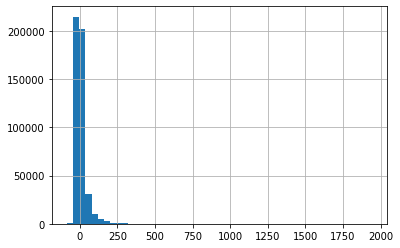

In [9]:
fly.ARR_DELAY.hist(bins = 50)

## Create a column for "on time status" to indicate if it's on time - True / False.

Also, create a column where there are 3 states (on-time, delayed, and early) so that we can play with that later.

In [10]:
fly['ON_TIME'] = fly['ARR_DELAY']
fly['ON_TIME'] = fly['ON_TIME'].apply(lambda x: 1 if x <= 1 else 0)

In [11]:
# fly['STATUS'] = fly['ARR_DELAY']
# fly['STATUS'] = fly['STATUS'].apply(lambda x: 'EARLY' if x < 0 else ('ONTIME' if x == 0 else 'DELAYED'))

## Initially drop some columns
* Drop all of the delay reason columns. Because they already tell you what it is.

In [12]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477183 entries, 0 to 477182
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         477183 non-null  int64  
 1   DAY_OF_WEEK          477183 non-null  int64  
 2   FL_DATE              477183 non-null  object 
 3   UNIQUE_CARRIER       477183 non-null  object 
 4   CARRIER              477183 non-null  object 
 5   FL_NUM               477183 non-null  int64  
 6   ORIGIN               477183 non-null  object 
 7   ORIGIN_CITY_NAME     477183 non-null  object 
 8   DEST_CITY_NAME       477183 non-null  object 
 9   ARR_TIME             470175 non-null  float64
 10  ARR_DELAY            469400 non-null  float64
 11  CARRIER_DELAY        110163 non-null  float64
 12  WEATHER_DELAY        110163 non-null  float64
 13  NAS_DELAY            110163 non-null  float64
 14  SECURITY_DELAY       110163 non-null  float64
 15  LATE_AIRCRAFT_DEL

In [13]:
fly.drop(columns = ['ARR_DELAY', 'Unnamed: 16'], inplace=True)

## Fill nulls

In [14]:
fly.isnull().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
CARRIER                     0
FL_NUM                      0
ORIGIN                      0
ORIGIN_CITY_NAME            0
DEST_CITY_NAME              0
ARR_TIME                 7008
CARRIER_DELAY          367020
WEATHER_DELAY          367020
NAS_DELAY              367020
SECURITY_DELAY         367020
LATE_AIRCRAFT_DELAY    367020
ON_TIME                     0
dtype: int64

In [15]:
fly.dropna(inplace=True)

# Preprocessing

In [16]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110163 entries, 3 to 477182
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         110163 non-null  int64  
 1   DAY_OF_WEEK          110163 non-null  int64  
 2   FL_DATE              110163 non-null  object 
 3   UNIQUE_CARRIER       110163 non-null  object 
 4   CARRIER              110163 non-null  object 
 5   FL_NUM               110163 non-null  int64  
 6   ORIGIN               110163 non-null  object 
 7   ORIGIN_CITY_NAME     110163 non-null  object 
 8   DEST_CITY_NAME       110163 non-null  object 
 9   ARR_TIME             110163 non-null  float64
 10  CARRIER_DELAY        110163 non-null  float64
 11  WEATHER_DELAY        110163 non-null  float64
 12  NAS_DELAY            110163 non-null  float64
 13  SECURITY_DELAY       110163 non-null  float64
 14  LATE_AIRCRAFT_DELAY  110163 non-null  float64
 15  ON_TIME          

## Checking if datatypes are logically assigned
* Day of month, Day of week should be categorical. They don't need to be ordered.
* Carrier and unique carrier are probably duplicates, same with origin and origin city name
* Add a column for status of on-time and delayed
* Flight number is also an object

In [17]:
fly.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST_CITY_NAME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ON_TIME
3,1,1,2014-12-01,AA,AA,4,LAX,"Los Angeles, CA","New York, NY",2144.0,3.0,0.0,0.0,0.0,51.0,0
4,1,1,2014-12-01,AA,AA,5,DFW,"Dallas/Fort Worth, TX","Honolulu, HI",2033.0,168.0,0.0,5.0,0.0,0.0,0
5,1,1,2014-12-01,AA,AA,6,OGG,"Kahului, HI","Dallas/Fort Worth, TX",541.0,1.0,0.0,0.0,0.0,30.0,0
6,1,1,2014-12-01,AA,AA,7,DFW,"Dallas/Fort Worth, TX","Kahului, HI",1742.0,29.0,0.0,9.0,0.0,29.0,0
16,1,1,2014-12-01,AA,AA,19,JFK,"New York, NY","Los Angeles, CA",1441.0,0.0,0.0,21.0,0.0,0.0,0


In [18]:
fly['DAY_OF_MONTH'] = fly['DAY_OF_MONTH'].astype('object')
fly['DAY_OF_WEEK'] = fly['DAY_OF_WEEK'].astype('object')
fly['FL_DATE'] = fly['FL_DATE'].astype('object')
fly['FL_NUM'] = fly['FL_NUM'].astype('object')

In [19]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110163 entries, 3 to 477182
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         110163 non-null  object 
 1   DAY_OF_WEEK          110163 non-null  object 
 2   FL_DATE              110163 non-null  object 
 3   UNIQUE_CARRIER       110163 non-null  object 
 4   CARRIER              110163 non-null  object 
 5   FL_NUM               110163 non-null  object 
 6   ORIGIN               110163 non-null  object 
 7   ORIGIN_CITY_NAME     110163 non-null  object 
 8   DEST_CITY_NAME       110163 non-null  object 
 9   ARR_TIME             110163 non-null  float64
 10  CARRIER_DELAY        110163 non-null  float64
 11  WEATHER_DELAY        110163 non-null  float64
 12  NAS_DELAY            110163 non-null  float64
 13  SECURITY_DELAY       110163 non-null  float64
 14  LATE_AIRCRAFT_DELAY  110163 non-null  float64
 15  ON_TIME          

## Transforming

In [20]:
fly.ARR_TIME.skew()

-1.0788984688866163

In [21]:
#fly.ARR_DELAY.hist(bins = 30)

In [22]:
#fly['ARR_DELAY'] = list(stats.yeojohnson(fly.ARR_DELAY)[0])

## Dropping columns


Drop Carrier and origin city name since they are repeats, so is flight date

In [23]:
fly.drop(columns = ['UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'FL_DATE'], inplace=True)

## Scaling

In [24]:
bool_list = [] # initiate a list
for (xcolname, xcol) in fly.iteritems(): # iterate through columns that
  bool_test = xcol.value_counts().index.tolist() # find the number of unique values per column
  if 1 and 0 in bool_test and len(bool_test) == 2: # if there are only 2 unique values, add them to the list
    bool_list.append(xcolname)

print(bool_list)# print the list

[]


In [25]:
for i in bool_list:
  fly[i] = fly[i].astype('bool')

In [26]:
num_cols_to_scale = fly.select_dtypes(exclude = ['object', 'bool']).columns.values.tolist()
num_cols_to_scale

['ARR_TIME',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'ON_TIME']

### Robust scaler

In [27]:
robust_scaler = RobustScaler().fit(fly[num_cols_to_scale])
fly[num_cols_to_scale] = robust_scaler.transform(fly[num_cols_to_scale])

### Standard scaler

In [28]:
# standard_scaler = StandardScaler().fit(fly[num_cols_to_scale])
# fly[num_cols_to_scale] = standard_scaler.transform(fly[num_cols_to_scale])

## Encoding

In [29]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110163 entries, 3 to 477182
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         110163 non-null  object 
 1   DAY_OF_WEEK          110163 non-null  object 
 2   CARRIER              110163 non-null  object 
 3   FL_NUM               110163 non-null  object 
 4   ORIGIN               110163 non-null  object 
 5   DEST_CITY_NAME       110163 non-null  object 
 6   ARR_TIME             110163 non-null  float64
 7   CARRIER_DELAY        110163 non-null  float64
 8   WEATHER_DELAY        110163 non-null  float64
 9   NAS_DELAY            110163 non-null  float64
 10  SECURITY_DELAY       110163 non-null  float64
 11  LATE_AIRCRAFT_DELAY  110163 non-null  float64
 12  ON_TIME              110163 non-null  float64
dtypes: float64(7), object(6)
memory usage: 11.8+ MB


In [30]:
x = fly.loc[:,fly.columns != 'ON_TIME']
y = fly.ON_TIME

In [31]:
x, y

(       DAY_OF_MONTH DAY_OF_WEEK CARRIER FL_NUM ORIGIN         DEST_CITY_NAME  \
 3                 1           1      AA      4    LAX           New York, NY   
 4                 1           1      AA      5    DFW           Honolulu, HI   
 5                 1           1      AA      6    OGG  Dallas/Fort Worth, TX   
 6                 1           1      AA      7    DFW            Kahului, HI   
 16                1           1      AA     19    JFK        Los Angeles, CA   
 ...             ...         ...     ...    ...    ...                    ...   
 477168           31           3      WN    477    SMF            Ontario, CA   
 477173           31           3      WN   2088    SMF            Phoenix, AZ   
 477175           31           3      WN   4839    SMF            Phoenix, AZ   
 477179           31           3      WN   3128    SMF          San Diego, CA   
 477182           31           3      WN    178    SMF            Seattle, WA   
 
         ARR_TIME  CARRIER

In [32]:
encoder = ce.LeaveOneOutEncoder(return_df=True)

In [33]:
encoded_fly = encoder.fit_transform(x, y)

In [34]:
encoded_fly

,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,FL_NUM,ORIGIN,DEST_CITY_NAME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3,0.0,0.0,0.0,0.0,0.0,0.0,0.584254,0.000000,0.0,-0.176471,0.0,1.433333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.430939,9.705882,0.0,0.117647,0.0,-0.266667
5,0.0,0.0,0.0,0.0,0.0,0.0,-1.629834,-0.117647,0.0,-0.176471,0.0,0.733333
6,0.0,0.0,0.0,0.0,0.0,0.0,0.029006,1.529412,0.0,0.352941,0.0,0.700000
16,0.0,0.0,0.0,0.0,0.0,0.0,-0.386740,-0.176471,0.0,1.058824,0.0,-0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...
477168,0.0,0.0,0.0,0.0,0.0,0.0,-0.305249,0.352941,0.0,-0.176471,0.0,0.933333
477173,0.0,0.0,0.0,0.0,0.0,0.0,-0.165746,0.235294,0.0,0.176471,0.0,0.500000
477175,0.0,0.0,0.0,0.0,0.0,0.0,-0.570442,0.294118,0.0,0.705882,0.0,-0.266667
477179,0.0,0.0,0.0,0.0,0.0,0.0,0.421271,-0.176471,0.0,-0.176471,0.0,0.433333


In [35]:
encoded_fly.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,FL_NUM,ORIGIN,DEST_CITY_NAME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,110163.0,110163.0,110163.0,110163.0,110163.0,110163.0,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,-0.159655,0.820031,1.286866,0.580050,0.064722,0.495634
std,0.0,0.0,0.0,0.0,0.0,0.0,0.785653,2.613967,13.769430,1.507272,1.638324,1.327661
min,0.0,0.0,0.0,0.0,0.0,0.0,-2.375691,-0.176471,0.000000,-0.176471,0.000000,-0.266667
25%,0.0,0.0,0.0,0.0,0.0,0.0,-0.563536,-0.176471,0.000000,-0.176471,0.000000,-0.266667
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.436464,0.823529,0.000000,0.823529,0.000000,0.733333
max,0.0,0.0,0.0,0.0,0.0,0.0,0.937845,113.764706,966.000000,58.235294,180.000000,42.733333


# Training and predicting

## Splitting training and test data

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(encoded_fly, y, test_size = .3, random_state = 7)

## Logistic regression

In [37]:
lr = LogisticRegression().fit(xtrain, ytrain)

ValueError: ignored

In [ ]:
lr_score = lr.score(xtest, ytest)

## KNN Classifier

In [38]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n).fit(xtrain, ytrain)

In [39]:
knn_score = knn.score(xtest, ytest)

# Classification Score Results

In [40]:
# print('{:.2f}'.format(lr_score), '- Logistic Score')
print('{:.2f}'.format(knn_score), '- KNN score with', n, 'neighbors')

1.00 - KNN score with 7 neighbors
